### Introducción a la Investigación Operativa y la Optimización

### • Clase 3  - Gradientes Conjugados

**Nazareno Faillace Mullen - Departamento de Matemática, FCEN, UBA**

# Gradientes Conjugados

__Definición:__ sea $A\in\mathbb{R}^{n\times n}$ definida positiva, diremos que los vectores $d^0, d^1,\dots, d^{n-1}\in\mathbb{R}^n-\{0\}$ son A-conjugados si:
$$ (d^i)^TAd^j = 0$$

__Lema:__ sea $A\in\mathbb{R}^{n\times n}$ definida positiva, cualquier conjunto de vectores A-conjugados es linealmente independiente.

Sea $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ dada por:
$$\frac{1}{2}x^TAx + bx^T +c$$
con $A\in\mathbb{R}^{n\times n}$ definida positiva, $b\in\mathbb{R}^n$, $c\in \mathbb{R}$.

Sea $\{d^0, \dots, d^k\}$ un conjunto de vectores A-conjugados cualquiera, la idea consiste en tomar:
$$x_{k+1} = x_{k} + t_kd_k \quad \text{donde} \quad t_k = \underset{t\in\mathbb{R}}{\mathrm{argmin}}\{f(x_k + td_k)\}$$
Notar que, como no sabemos si los $d_k$ son direcciones de descenso, no pedimos que $t_k$ sea necesariamente positivo. Nuevamente, definimos $\varphi(t) = f(x_k + t d_k)$ y, como $f$ es cuadrática, podemos hallar el $t$ óptimo:
$$t_k = - \dfrac{\nabla f(x_k)^T d_k}{(d_k)^TAd_k}= -\dfrac{(Ax_k +b)^T d_k}{(d_k)^TAd_k}$$

__Teorema:__ Sea $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ dada por $\frac{1}{2}x^TAx + bx^T +c$ con $A\in\mathbb{R}^{n\times n}$ definida positiva, $b\in\mathbb{R}^n$, $c\in \mathbb{R}$, entonces dado $x_0\in\mathbb{R}^n$, la secuencia definida anteriormente alcanza el minimizador $x^\ast$ en $n$ pasos (i.e. $x_n = x^\ast$).


__Lema:__ sea $x_0\in \mathbb{R}^n$, la secuencia definida anteriormente cumple que:
$$ \nabla f(x_k)^Td_j = 0 \quad \forall j=0,1,\dots,k-1 $$
### Gradientes conjugados

La idea consiste en que las direcciones conjugadas $\{d_0, \dots, d_k\}$ sean definidas a partir del gradiente de $f$. Sea $x_0\in\mathbb{R}^n$, se define $d_0 = -\nabla f(x_0)$ y, para $k=0,1,\dots,n-2$ se define:
$$d_{k+1} = -\nabla f(x_{k+1}) + \beta_kd_k$$
donde $\beta_k$ es calculado de manera tal que $d_k$ y $d_{k+1}$ sean A-conjugados:
$$\beta_k = \dfrac{(d_k)^T A \nabla f(x_{k+1})}{(d_k)^TAd_k}$$

__Obs:__ $d_k$ son direcciones de descenso:
$$\nabla f(x_k)^T d_k = \nabla f(x_k)^T (-\nabla f(x_k)+\beta_{k-1}d_{k-1}) = -\lVert \nabla f(x_k) \rVert ^2 $$

### Algoritmo de Gradientes Conjugados (para cuadráticas)

Dados: $A\in\mathbb{R}^{n\times n}$ definida positiva, $b,\; x_0 \in \mathbb{R}^n, \; \varepsilon > 0, \; k_{MAX} > 0$ <br>
$d_0 = -(Ax_0 + b)$ <br>
$k = 0$ <br>
REPETIR mientras $\lVert Ax_k + b \rVert > \varepsilon$ y $k<k_{MAX}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $t_k = - \dfrac{(Ax_k+b)^T d_k}{(d_k)^TAd_k}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + t_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\beta_k = \dfrac{(d_k)^T A (Ax_{k+1} + b)}{(d_k)^TAd_k}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $d_{k+1} = -(Ax_{k+1} + b) + \beta_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $k = k+1$ <br>
DEVOLVER $x_k$

## Ejercicios

1. Implementar Gradientes Conjugados para funciones cuadráticas. Debe tomar como input la matriz $A$, el vector $b$, el vector inicial $x_0$ y la cantidad máxima de iteraciones $k_{MAX}$. Se puede tomar $\varepsilon = 10^{-8}$.
2. Comparar el desempeño (en término de cantidad de iteraciones) de Gradiente Conjugado con el del Método del Gradiente para las funciones cuadráticas dadas por $f(x)=\frac{1}{2}x^T A_i x$ para cada una de las $A_i$ que figuran debajo. ¿Qué se observa? Analizar los autovalores de cada $A_i$ utilizando la función `np.linalg.eigvals`. Probar utilizando como $x_0$:
    - el vector de 1's (`np.ones`)
    - con vectores aleatorios con valores en [0,1]x[0,1] (`np.random.rand(n)` donde `n` es la dimensión del vector) (utilizar el mismo punto de partida para ambos métodos)
3. ¿Por qué el método de Gradientes Conjugados para $A_6$ termina antes de $6$ iteraciones?  
4. Modificar ambos métodos para que también devuelvan la secuencia $\{x_k\}_k$. Para $A_4$ y $A_5$, utilizar las funciones `a_forma_cuadratica` y `graficar_recorrido` definidas más abajo para comparar el recorrido realizado por cada método. [Ver el ejemplo de cómo utilizar dichas funciones]. Como punto inicial para ambos experimentos, **utilizar $x_0 = (-0.15, 1)$**

In [ ]:
import numpy as np
from numpy.linalg import norm
from functools import partial
import matplotlib.pyplot as plt

A1 = np.array([[8, 3, 3, 6, 5, 4, 4, 3, 6, 3],
             [3, 4, 2, 2, 2, 1, 3, 3, 3, 2],
             [3, 2, 5, 2, 1, 2, 4, 2, 4, 1],
             [6, 2, 2, 6, 3, 2, 4, 2, 4, 2],
             [5, 2, 1, 3, 5, 4, 1, 2, 4, 3],
             [4, 1, 2, 2, 4, 5, 1, 2, 5, 2],
             [4, 3, 4, 4, 1, 1, 6, 2, 4, 2],
             [3, 3, 2, 2, 2, 2, 2, 4, 4, 2],
             [6, 3, 4, 4, 4, 5, 4, 4, 8, 3],
             [3, 2, 1, 2, 3, 2, 2, 2, 3, 4]])

A2 = np.array([[2, 0, 1, 0, 1],
               [0, 2, 1, 1, 1],
               [1, 1, 3, 1, 1],
               [0, 1, 1, 1, 0],
               [1, 1, 1, 0, 2]])

A3 = np.diag(np.random.randint(1, 5, 100))

A4 = np.array([[10, 0], [0, 1]])

A5 = np.array([[1, -1], [0, 0.8]])

A6 = np.array([[163., 162., 171.,  -9.,   0.,   0.],
               [162., 163., 171.,  -9.,   0.,   0.],
               [171., 171., 181.,  -9.,   0.,   0.],
               [ -9.,  -9.,  -9.,   1.,   0.,   0.],
               [  0.,   0.,   0.,   0.,   1.,   0.],
               [  0.,   0.,   0.,   0.,   0.,   1.]])


#def f(x, A):
#  return 1/2 * x.T @ A @ x


def gradiente_conjugado(A, b, x0, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = - (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    x_k = x_k + t_k * d_k
    beta_k = (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
  return x_k, k




def derivada_parcial(f,x,i):
    h = 0.1
    e_i = np.zeros(len(x))
    e_i[i] = 1
    z = (f(x + h*e_i) - f(x - h*e_i)) / (2*h)
    # z representa la primera aproximación a la derivada parcial de f en x con respecto a la i-ésima variable
    h = h/2
    y = (f(x + h*e_i) - f(x - h*e_i)) / (2*h)
    # Se reduce el valor de h a la mitad, luego se calcula y nuevamente con esta reducción de paso para refinar la estimación
    error = norm(y-z)
    eps = 1e-8
    while error>eps and (y != np.nan) and (y != np.inf):
        error = norm(y-z)
        z = y
        h = h/2
        y = (f(x + h*e_i) - f(x - h*e_i)) / (2*h)
        # En cada iteración, el valor de h se reduce a la mitad, y y se vuelve a calcular. La nueva estimación se guarda en z, y el error se vuelve a calcular
    return z # z es la mejor aproximación obtenida


def gradiente(f, x):
    return np.array([derivada_parcial(f, x, i) for i in range(len(x))])


def busqueda_armijo(f, x, d, eta=0.2, betha=2, eps_parada=1e-4): #eta = η  En este ejercicio, eta es el alpha de Armijo de la teorica
  t=1
  gradiente_val = gradiente(f, x)
  if f(x + t*d) <= f(x) + eta * t * np.dot(gradiente_val, d):
    while f(x + t*d) <= f(x) + eta * t * np.dot(gradiente_val, d) and t>eps_parada: #agrego condicion para que t no sea demasiado pequeño
      t = t * betha
    return t / betha # Devuelvo el último paso válido
  else:
     while f(x + t*d) > f(x) + eta * t * np.dot(gradiente_val, d) and t>eps_parada: #agrego condicion para que t no sea demasiado pequeño
      t = t / betha
     return t


def metodo_gradiente(A, b, x0, eps=1e-8, k_max=1000):
    k = 0
    x_k = x0
    d = -A @ x0 - b     # Dirección del primer paso
    while  np.linalg.norm(d) > eps and k <= k_max:
        t = d.T @ d / (d.T @ A @ d) # Determino la longitud del paso
        x_k = x_k + t*d     # Calculo el siguiente punto de la iteración ("doy el paso")
        d = -A @ x_k - b     # Dirección del próximo paso
        k = k+1
    return x_k, k   # Devuelve la aproximación al mínimo y la cantidad de iteraciones


In [ ]:
## Ejercicio 2:

b_1 = np.zeros(A1[0].shape)
x0_1 = np.ones(A1[0].shape)
min_x_A1_grad_conj, min_k_A1_grad_conj = gradiente_conjugado(A1, b_1, x0_1)
min_x_A1_met_grad, min_k_A1_met_grad = metodo_gradiente(A1, b_1, x0_1)
print(f"Con gradiente conjugado A1 realiza {min_k_A1_grad_conj} iteraciones y con metodo del gradiente {min_k_A1_met_grad}")
#print(f"El minimo es {min_x_A1_grad_conj} y la cantidad de iteraciones es {min_k_A1_grad_conj}")
#print(f"El minimo es {min_x_A1_met_grad} y la cantidad de iteraciones es {min_k_A1_met_grad}")

b_2 = np.zeros(A2[0].shape)
x0_2 = np.ones(A2[0].shape)
min_x_A2_grad_conj, min_k_A2_grad_conj = gradiente_conjugado(A2, b_2, x0_2)
min_x_A2_met_grad, min_k_A2_met_grad = metodo_gradiente(A2, b_2, x0_2)
print(f"Con gradiente conjugado A2 realiza {min_k_A2_grad_conj} iteraciones y con metodo del gradiente {min_k_A2_met_grad}")
#print(f"El minimo es {min_x_A2_grad_conj} y la cantidad de iteraciones es {min_k_A2_grad_conj}")
#print(f"El minimo es {min_x_A2_met_grad} y la cantidad de iteraciones es {min_k_A2_met_grad}")

b_3 = np.zeros(A3[0].shape)
x0_3 = np.ones(A3[0].shape)
min_x_A3_grad_conj, min_k_A3_grad_conj = gradiente_conjugado(A3, b_3, x0_3)
min_x_A3_met_grad, min_k_A3_met_grad = metodo_gradiente(A3, b_3, x0_3)
print(f"Con gradiente conjugado A3 realiza {min_k_A3_grad_conj} iteraciones y con metodo del gradiente {min_k_A3_met_grad}")
#print(f"El minimo es {min_x_A3_grad_conj} y la cantidad de iteraciones es {min_k_A3_grad_conj}")
#print(f"El minimo es {min_x_A3_met_grad} y la cantidad de iteraciones es {min_k_A3_met_grad}")

b_4 = np.zeros(A4[0].shape)
x0_4 = np.ones(A4[0].shape)
min_x_A4_grad_conj, min_k_A4_grad_conj = gradiente_conjugado(A4, b_4, x0_4)
min_x_A4_met_grad, min_k_A4_met_grad = metodo_gradiente(A4, b_4, x0_4)
print(f"Con gradiente conjugado A4 realiza {min_k_A4_grad_conj} iteraciones y con metodo del gradiente {min_k_A4_met_grad}")
#print(f"El minimo es {min_x_A4_grad_conj} y la cantidad de iteraciones es {min_k_A4_grad_conj}")
#print(f"El minimo es {min_x_A4_met_grad} y la cantidad de iteraciones es {min_k_A4_met_grad}")

b_5 = np.zeros(A5[0].shape)
x0_5 = np.ones(A5[0].shape)
min_x_A5_grad_conj, min_k_A5_grad_conj = gradiente_conjugado(A5, b_5, x0_5)
min_x_A5_met_grad, min_k_A5_met_grad = metodo_gradiente(A5, b_5, x0_5)
print(f"Con gradiente conjugado A5 realiza {min_k_A5_grad_conj} iteraciones y con metodo del gradiente {min_k_A5_met_grad}")
#print(f"El minimo es {min_x_A5_grad_conj} y la cantidad de iteraciones es {min_k_A5_grad_conj}")
#print(f"El minimo es {min_x_A5_met_grad} y la cantidad de iteraciones es {min_k_A5_met_grad}")

b_6 = np.zeros(A6[0].shape)
x0_6 = np.ones(A6[0].shape)
min_x_A6_grad_conj, min_k_A6_grad_conj = gradiente_conjugado(A6, b_6, x0_6)
min_x_A6_met_grad, min_k_A6_met_grad = metodo_gradiente(A6, b_6, x0_6)
print(f"Con gradiente conjugado A6 realiza {min_k_A6_grad_conj} iteraciones y con metodo del gradiente {min_k_A6_met_grad}")
#print(f"El minimo es {min_x_A6_grad_conj} y la cantidad de iteraciones es {min_k_A6_grad_conj}")
#print(f"El minimo es {min_x_A6_met_grad} y la cantidad de iteraciones es {min_k_A6_met_grad}")

Con gradiente conjugado A1 realiza 11 iteraciones y con metodo del gradiente 1001
Con gradiente conjugado A2 realiza 5 iteraciones y con metodo del gradiente 448
Con gradiente conjugado A3 realiza 4 iteraciones y con metodo del gradiente 40
Con gradiente conjugado A4 realiza 2 iteraciones y con metodo del gradiente 16
Con gradiente conjugado A5 realiza 2 iteraciones y con metodo del gradiente 2
Con gradiente conjugado A6 realiza 3 iteraciones y con metodo del gradiente 741


In [ ]:
#Analizar los autovalores de cada  Ai  utilizando la función np.linalg.eigvals. Probar utilizando como  x0 : el vector de 1's (np.ones)
#con vectores aleatorios con valores en [0,1]x[0,1] (np.random.rand(n) donde n es la dimensión del vector)
#(utilizar el mismo punto de partida para ambos métodos)

#Info: Analizar los autovalores de la matriz A (o una constante escalada cA de esta matriz) nos puede dar una idea de cuán difícil es el problema
#para los métodos de optimización que estamos utilizando. Los autovalores de una matriz simétrica y definida positiva como A están relacionados
#con la condición de la matriz, que afecta la velocidad de convergencia de métodos como el Gradiente Conjugado y el Método del Gradiente.
#Los autovalores nos indicarán la condición del problema. Una matriz con autovalores que varían mucho entre sí tendrá un número de condición alto,
#lo cual dificulta la optimización, especialmente para el Método del Gradiente.

autovalores_A1 = np.linalg.eigvals(A1)
print(f"Autovalores de A1 {autovalores_A1}")


autovalores_A2 = np.linalg.eigvals(A2)
print(f"Autovalores de A2 {autovalores_A2}")

autovalores_A3 = np.linalg.eigvals(A3)
print(f"Autovalores de A3 {autovalores_A3}")

autovalores_A4 = np.linalg.eigvals(A4)
print(f"Autovalores de A4 {autovalores_A4}")

autovalores_A5 = np.linalg.eigvals(A5)
print(f"Autovalores de A5 {autovalores_A5}")

autovalores_A6 = np.linalg.eigvals(A6)
print(f"Autovalores de A6 {autovalores_A6}")


Autovalores de A1 [3.31534769e+01 7.45434866e+00 5.04599339e+00 4.06214518e+00
 2.24629438e+00 1.51482583e+00 8.46374547e-01 4.64805832e-01
 2.08911748e-01 2.82353186e-03]
Autovalores de A2 [5.21855007 0.06960088 0.70964221 2.35428119 1.64792565]
Autovalores de A3 [1. 3. 1. 3. 4. 4. 3. 4. 1. 4. 2. 1. 4. 4. 3. 3. 1. 3. 1. 3. 4. 1. 2. 4.
 3. 1. 1. 3. 1. 1. 4. 4. 3. 1. 1. 4. 3. 2. 3. 3. 3. 4. 4. 4. 1. 1. 4. 1.
 2. 4. 2. 4. 1. 2. 4. 3. 2. 4. 1. 1. 4. 3. 3. 4. 2. 3. 3. 1. 2. 2. 3. 3.
 4. 4. 2. 4. 4. 1. 2. 3. 4. 2. 2. 1. 1. 4. 3. 1. 2. 1. 2. 2. 1. 3. 3. 4.
 2. 1. 4. 4.]
Autovalores de A4 [10.  1.]
Autovalores de A5 [1.  0.8]
Autovalores de A6 [5.05802294e+02 1.97705707e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [ ]:
#A1
# Punto de partida: Vector de unos
n_A1 = len(A1[0])
b_A1 = np.zeros(n_A1)
x0_A1_ones = np.ones(n_A1)
min_x_A1_grad_conj_ones, iters_A1_grad_conj_ones = gradiente_conjugado(A1, b_A1, x0_A1_ones)
min_x_A1_met_grad_ones, iters_A1_met_grad_ones = metodo_gradiente(A1, b_A1, x0_A1_ones)

# Punto de partida: Vector aleatorio en [0,1]
x0_A1_rand = np.random.rand(n_A1)
min_x_A1_grad_conj_rand, iters_A1_grad_conj_rand = gradiente_conjugado(A1, b_A1, x0_A1_rand)
min_x_A1_met_grad_rand, iters_A1_met_grad_rand = metodo_gradiente(A1, b_A1, x0_A1_rand)

# Resultados
print("Para A1:")
print("Con punto de partida x0 = ones:")
print(f"Gradiente Conjugado - Iteraciones: {iters_A1_grad_conj_ones}, Minimo: {min_x_A1_grad_conj_ones}")
print(f"Método del Gradiente - Iteraciones: {iters_A1_met_grad_ones}, Minimo: {min_x_A1_met_grad_ones}")

print("\nCon punto de partida x0 = vector aleatorio:")
print(f"Gradiente Conjugado - Iteraciones: {iters_A1_grad_conj_rand}, Minimo: {min_x_A1_grad_conj_rand}")
print(f"Método del Gradiente - Iteraciones: {iters_A1_met_grad_rand}, Minimo: {min_x_A1_met_grad_rand}")


#A6
# Punto de partida: Vector de unos
n_A6 = len(A6[0])
b_A6 = np.zeros(n_A6)
x0_A6_ones = np.ones(n_A6)
min_x_A6_grad_conj_ones, iters_A6_grad_conj_ones = gradiente_conjugado(A6, b_A6, x0_A6_ones)
min_x_A6_met_grad_ones, iters_A6_met_grad_ones = metodo_gradiente(A6, b_A6, x0_A6_ones)

# Punto de partida: Vector aleatorio en [0,1]
x0_A6_rand = np.random.rand(n_A6)
min_x_A6_grad_conj_rand, iters_A6_grad_conj_rand = gradiente_conjugado(A6, b_A6, x0_A6_rand)
min_x_A6_met_grad_rand, iters_A6_met_grad_rand = metodo_gradiente(A6, b_A6, x0_A6_rand)

# Resultados
print("\nPara A6:")
print("Con punto de partida x0 = ones:")
print(f"Gradiente Conjugado - Iteraciones: {iters_A6_grad_conj_ones}, Minimo: {min_x_A6_grad_conj_ones}")
print(f"Método del Gradiente - Iteraciones: {iters_A6_met_grad_ones}, Minimo: {min_x_A6_met_grad_ones}")

print("\nCon punto de partida x0 = vector aleatorio:")
print(f"Gradiente Conjugado - Iteraciones: {iters_A6_grad_conj_rand}, Minimo: {min_x_A6_grad_conj_rand}")
print(f"Método del Gradiente - Iteraciones: {iters_A6_met_grad_rand}, Minimo: {min_x_A6_met_grad_rand}")

Para A1:
Con punto de partida x0 = ones:
Gradiente Conjugado - Iteraciones: 11, Minimo: [-8.32776513e-11  1.45508466e-10  2.85128653e-10  6.75498754e-11
 -3.28856192e-10 -2.93865262e-10  4.07026836e-10  3.12298867e-11
 -3.96466328e-11 -1.01077001e-10]
Método del Gradiente - Iteraciones: 1001, Minimo: [ 0.00464227  0.02995705  0.00726462  0.01906015 -0.0430453   0.02470606
 -0.02929501 -0.02075257 -0.00343957  0.01771924]

Con punto de partida x0 = vector aleatorio:
Gradiente Conjugado - Iteraciones: 11, Minimo: [ 1.91439703e-11 -5.29160743e-11 -9.10835773e-11 -4.33061434e-11
  1.16690040e-10  1.18918674e-10 -1.52362140e-10 -4.05992254e-12
  2.71292359e-11  3.43461145e-11]
Método del Gradiente - Iteraciones: 1001, Minimo: [ 0.02889384  0.18636109  0.04519998  0.11857907 -0.26775897  0.15369766
 -0.18222365 -0.1290859  -0.02137996  0.11023348]

Para A6:
Con punto de partida x0 = ones:
Gradiente Conjugado - Iteraciones: 3, Minimo: [ 1.21458399e-13  1.21458399e-13  1.58373314e-13  5.218048

In [ ]:
##Ejercicio 3:
#¿Por qué el método de Gradientes Conjugados para  A6  termina antes de  6  iteraciones?

#Este método tiene la propiedad de que, en teoría, puede converger en un número de iteraciones igual al número de autovalores distintos de
#la matriz. Como en el Ejercicio 2 vimos que A6 tiene 6 autovalores, este metodo converge en 6 iteraciones. Pero en este caso converge en menos
#debido a la estructura de la matriz, ya que está compuesta de muchos ceros, y valores que se repiten.


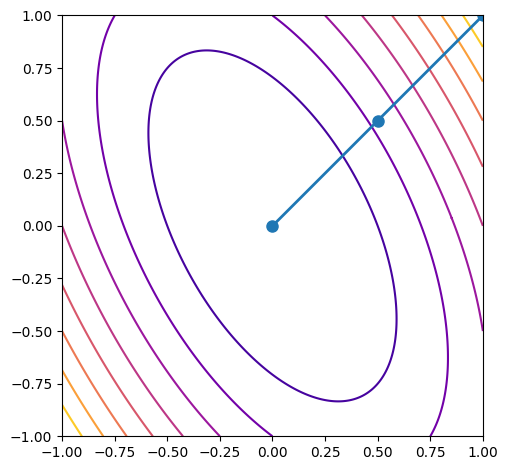

In [ ]:
def a_forma_cuadratica(A):
    """
    Transforma la función dada por (1/2)(x^T A x) a una función dada en términos de x1 y x2 para que sea posible
    graficar sus curvas de nivel en R2.
    A tiene que ser una matriz de 2x2
    """
    def forma_cuadratica(x):
        return 0.5*(A[0,0]*(x[0]**2) + (A[0,1]+A[1,0])*x[0]*x[1] + A[1,1]*(x[1]**2))
    return forma_cuadratica

#Analizar los autovalores de cada 𝐴𝑖 utilizando la función np.linalg.eigvals.
#Probar utilizando como 𝑥0:
#- el vector de 1's (np.ones)
#- con vectores aleatorios con valores en [0,1]x[0,1] (np.random.rand(n) donde n es la dimensión del vector)


%matplotlib inline
def graficar_recorrido(f, limites, recorrido=None, levels=10):
    """
    Función que grafica curvas de nivel y, opcionalmente, el recorrido de un método.
    f : es la función a graficar (tiene que ir de R2 en R)
    limites : es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    recorrido : acepta una lista de arrays bidimensionales para graficar el recorrido de un método
    levels : cantidad de curvas de nivel a graficar
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    plt.contour(X,Y,Z, cmap='plasma', levels=levels)
    if recorrido is not None:
        x_coords = [x[0] for x in recorrido]
        y_coords = [x[1] for x in recorrido]
        plt.plot(x_coords, y_coords, marker='o', lw=2, ms=8)
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


# Crear puntos de prueba para el recorrido (opcional)
points = [np.array([0, 0]), np.array([0.5, 0.5]), np.array([1, 1])]

graficar_recorrido(a_forma_cuadratica(A1), [-1, 1, -1, 1], points)

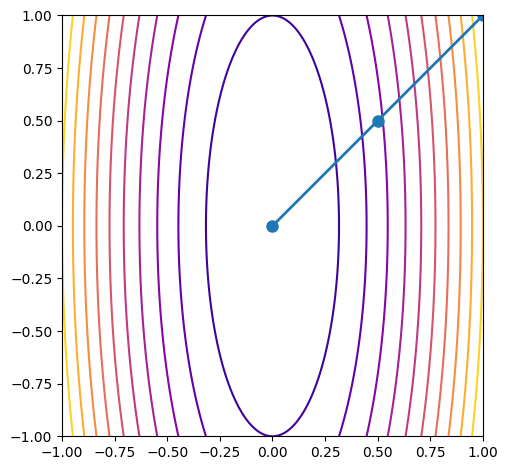

In [ ]:
# EJEMPLO PARA GRAFICAR EL RECORRIDO EN EL EJERCICIO 3
#x_opt, iteraciones, recorrido = metodo_gradiente(A4, np.zeros(2), np.ones(2), 100)
x_opt, iteraciones = gradiente_conjugado(A4, np.zeros(2), np.ones(2), 100)
f = a_forma_cuadratica(A4)
graficar_recorrido(f, [-1, 1, -1, 1], points)

### Extensión para funciones no cuadráticas

Se deben encontrar otras maneras de obtener la longitud del paso $t_k$ y el coeficiente $\beta_k$

__Obs:__ si $t_k$ minimiza $\varphi$ entonces las $d^k$ son direcciones de descenso. Sin embargo, la búsqueda de Armijo no alcanza para asegurar tal propiedad.

$$t_k \rightarrow \color{green}{\text{Wolfe o Sección Áurea}}$$

utilizando en Wolfe $0<c_1<c_2<\frac{1}{2}$.

Para definir el coeficiente $\beta_k$ se puede utilizar la fórmula de Fletcher y Reeves:

$$\beta^{FR}_k = \dfrac{\nabla f(x_{k+1})^T \nabla f(x_{k+1})}{\nabla f(x_{k})^T \nabla f(x_{k})} $$

o la de Polak-Ribiere:

$$\beta^{PR}_k = \dfrac{(\nabla f(x_{k+1}) - \nabla f(x_{k}))^T\nabla f(x^{k+1})}{\nabla f(x_{k})^T \nabla f(x_{k})}$$

Para el caso de funciones cuadráticas, se puede demostrar que $\beta_k = \beta^{FR}_k = \beta^{PR}_k$

Gradientes Conjugados para funciones no cuadráticas no necesariamente terminan en $n$ pasos. Una práctica que da buenos resultados es reiniciar el $\beta_k$ cada $n$ iteraciones.

In [ ]:
def fletcher_reeves(x_k, x_k_1):
  return (gradiente(f, x_k_1).T @ gradiente(f, x_k_1)) / (gradiente(f, x_k).T @ gradiente(f, x_k))

def polak_ribiere(x_k, x_k_1):
  return (gradiente(f, x_k_1) - gradiente(f, x_k)).T @ gradiente(f, x_k_1) / (gradiente(f, x_k).T @ gradiente(f, x_k))

### Algoritmo de Gradientes Conjugados

Dados: $f,\; x_0 \in \mathbb{R}^n, \; \varepsilon > 0, \; k_{MAX} > 0$ <br>
$d_0 = -\nabla f(x_0)$ <br>
$k = 0$ <br>
REPETIR mientras $\lVert \nabla f(x_k) \rVert > \varepsilon$ y $k<k_{MAX}$<br>
&nbsp;&nbsp;&nbsp;&nbsp; Calcular $t_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Hacer $x_{k+1} = x_k + t_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si $k + 1 \neq 0 \mod(n)$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Calcular $\beta_k$ (utilizando la fórmula de Fletcher y Reeves o la de Polak-Ribiere) <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si no: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\beta_k = 0$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Definir $d_{k+1} = -\nabla f(x_{k+1}) + \beta_kd_k$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $k=k+1$ <br>
DEVOLVER $x_{k}$ <br>

**Obs.:** para calcular módulo, utilizar `%`. Ejemplo: `x % 4` devuelve $x$ módulo 4

### Búsqueda Exacta - Sección Áurea

__Cómo aproximar un minimizador de una función con Sección Áurea__

Supongamos que sabemos que un minimizador se encuentra en $[a,b]$.
* Considerar $a<u<v<b$
* Si $\varphi(u) < \varphi(v)$, entonces el intervalo $[v,b]$ no puede contener un minimizador y es descartado
* Si $\varphi(u) \geq \varphi(v)$, entonces el intervalo $[a,u]$ puede ser descartado
* Particionar el intervalo resultante y repetir el proceso.

El método de la sección áurea consiste en tomar:
$$u = a + \frac{3-\sqrt{5}}{2}(b-a) \qquad v = a + \dfrac{\sqrt{5}-1}{2}(b-a)$$

El algoritmo de la sección áurea consiste en 2 fases: en la primera, se busca un intervalo $[a,b]$ que contenga un minimizador de $\varphi$ ; en la segunda, se reduce el intervalo $[a,b]$ hasta que la precisión deseada $\varepsilon$ es alcanzada.

__Algoritmo de sección áurea__

Dados: $f, \; x\in\mathbb{R}^n,\; d\in\mathbb{R}^n,\; \varepsilon > 0,\; \rho>0$<br>
Definir $\theta_1 = \frac{3-\sqrt{5}}{2}$, $\theta_2 = 1 - \theta_1$ <br>
Definir $a = 0$, $s = \rho$, $b=2\rho$ <br>
Definir $\varphi_b = f(x+b*d), \; \varphi_s = f(x+s*d)$ <br>
REPETIR mientras $\varphi_b<\varphi_s$: <br>
&nbsp;&nbsp;&nbsp;&nbsp; $a=s$, $s=b$, $b=2b$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; $\varphi_s = \varphi_b, \; \varphi_b = f(x+b*d)$ <br>
Definir $u = a+\theta_1(b-a), \; v=a+\theta_2(b-a)$ <br>
Definir $\varphi_u = f(x+u*d), \; \varphi_v = f(x+v*d)$ <br>
REPETIR mientras $(b-a)>\varepsilon$: <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si $\varphi_u<\varphi_v$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b=v, \; v=u,\; u=a+\theta_1(b-a)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\varphi_v = \varphi_u,\; \varphi_u = f(x+u*d)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; Si no: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $a=u,\; u=v,\; v= a+\theta_2(b-a)$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\varphi_u = \varphi_v,\; \varphi_v = f(x+v*d)$ <br>
Devolver $t = \dfrac{u+v}{2}$

Valores usuales para los parámetros: $\varepsilon = 10^{-5},\; \rho=1$ <br>
**Obs.:** utilizar `np.sqrt(n)` para calcular la raíz cuadrada de `n`.

In [ ]:
def seccion_aurea(f, x , d, eps=1e-5, ρ=1):
  theta_1 = (3 - np.sqrt(5)) / 2
  theta_2 = 1 - theta_1
  a = 0
  s = ρ
  b = 2*ρ
  psi_b = f(x + b*d)
  psi_s = f(x + s*d)
  while psi_b < psi_s:
    a = s
    s = b
    b = 2*b
    psi_s = psi_b
    psi_b = f(x + b*d)
  u = a + theta_1*(b-a)
  v = a + theta_2*(b-a)
  psi_u = f(x + u*d)
  psi_v = f(x + v*d)
  while b-a > eps:
    if psi_u < psi_v:
      b = v
      v = u
      u = a + theta_1*(b-a)
      psi_v = psi_u
      psi_u = f(x + u*d)
    else:
      a = u
      u = v
      v = a + theta_2*(b-a)
      psi_u = psi_v
      psi_v = f(x + v*d)
  return (u + v) / 2  # este será el t, el minimizador de psi


## Ejercicios

1. Implementar el método de Gradientes Conjugados para funciones en general. Para encontrar la longitud del paso, utilizar las condiciones de Wolfe o Sección Áurea.
2. Aplicar a la función de Rosenbrock en 2 dimensiones y a $f(x_1,x_2)= 2(e^{(-x_1^2-x_2^2)} - e^{(-(x_1-1)^2-(x_2-1)^2)})$. Comparar con el desempeño del Método del Gradiente.

In [ ]:
##Ejercicio 1:

def gradientes_conjugados(f, x_k, eps=1e-8, k_max=1000):
  d_k = -gradiente(f, x_k)
  k = 0
  while norm(gradiente(f, x_k)) > eps and k < k_max:
    t_k = seccion_aurea(f, x_k, d_k)
    x_k_1 = x_k + t_k * d_k
    if (k+1) % len(x_k) != 0:
      beta_k = fletcher_reeves(x_k, x_k_1)
    else:
      beta_k = 0
    d_k = -gradiente(f, x_k_1) + beta_k * d_k
    x_k = x_k_1  # Actualizo x_k con el nuevo valor
    k += 1
  return x_k, k

In [ ]:
def rosenbrock(x):
    """
    minimiser : x = (1,..., 1)
    """
    d = np.shape(x)[0]
    return sum(100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2 for i in range(d-1))

def resta_exponenciales(x):
    s1 = np.exp(-x[0] ** 2 - x[1] ** 2)
    s2 = np.exp(-(x[0] - 1) ** 2 - (x[1] - 1) ** 2)
    return (s1 - s2) * 2


x_0 = np.ones(2)
x_0_random = np.random.rand(2)
min_grad_conjugados_rosenbrock_ones, iter_rosenbrock_ones = gradientes_conjugados(rosenbrock, x_0)
min_grad_conjugados_resta_exponenciales_ones, iter_resta_exponenciales_ones = gradientes_conjugados(resta_exponenciales, x_0)
min_grad_conjugados_rosenbrock_random, iter_rosenbrock_random = gradientes_conjugados(rosenbrock, x_0_random)
min_grad_conjugados_resta_exponenciales_random, iter_resta_exponenciales_random = gradientes_conjugados(resta_exponenciales, x_0_random)

print("Metodo del gradiente conjugado con punto de partida x0: unos")
print(f"El minimo es {min_grad_conjugados_rosenbrock_ones} y la cantidad de iteraciones es {iter_rosenbrock_ones}")
print(f"El minimo es {min_grad_conjugados_resta_exponenciales_ones} y la cantidad de iteraciones es {iter_resta_exponenciales_ones}")

print("\nMetodo del gradiente conjugado con punto de partida x0: vector aleatorio")
print(f"El minimo es {min_grad_conjugados_rosenbrock_random} y la cantidad de iteraciones es {iter_rosenbrock_random}")
print(f"El minimo es {min_grad_conjugados_resta_exponenciales_random} y la cantidad de iteraciones es {iter_resta_exponenciales_random}")

Metodo del gradiente conjugado con punto de partida x0: unos
El minimo es [1. 1.] y la cantidad de iteraciones es 0
El minimo es [1.09983932 1.09983932] y la cantidad de iteraciones es 7

Metodo del gradiente conjugado con punto de partida x0: vector aleatorio
El minimo es [1. 1.] y la cantidad de iteraciones es 973
El minimo es [72.74733151 61.53620625] y la cantidad de iteraciones es 2
